# Imports

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.signal import savgol_filter

# Seleção dos dados

In [3]:
file_path = r'.\planilha_tommy.xlsx'
fs_df = pd.read_excel(file_path)
fs_df.head()

,DATA,Tratamento,ID,SST (°brix),Firmeza (N),AAC,ATT,%UBS,900.577121,904.475237,...,1675.187331,1678.109677,1681.027723,1683.941471,1686.850921,1689.756072,1692.656924,1694.588437,1697.482126,1700.371515
0,2022-11-30,T4,200,7.4,64.075,1.967110,0.513016,0.135894,0.273498,0.274235,...,0.560792,0.557848,0.551992,0.553133,0.548771,0.552477,0.562847,0.565538,0.571129,0.582577
1,2022-11-30,NaN,203,5.8,84.625,2.556114,0.521293,0.168376,0.275207,0.276366,...,0.607996,0.600727,0.602417,0.595198,0.590330,0.595591,0.614829,0.622361,0.620451,0.635016
2,2022-11-30,NaN,204,5.0,82.725,3.308635,0.516323,0.130366,0.305519,0.309654,...,0.630088,0.625680,0.615633,0.616257,0.614205,0.627703,0.634810,0.632610,0.640129,0.646687
3,2022-11-30,NaN,206,5.0,80.050,2.925292,0.710677,0.134996,0.286874,0.288040,...,0.586665,0.581112,0.574717,0.573498,0.568604,0.577081,0.589463,0.599911,0.603186,0.612682
4,2022-11-30,T8,303,5.0,111.275,4.976710,0.299231,0.148507,0.291156,0.292675,...,0.596514,0.585810,0.576604,0.574335,0.570918,0.577452,0.590326,0.594164,0.601240,0.614683


In [4]:
params = ['SST (°brix)', 'Firmeza (N)', 'AAC', 'ATT', '%UBS']
fs_params = fs_df[params].dropna()

fs_vars = fs_df.iloc[:, 8:].columns.to_list()
dados_wl = fs_df[fs_vars].dropna()

wl = np.array([float(col) for col in fs_vars])
print(wl)


[ 900.577121  904.475237  908.369055  912.258573  916.143794  918.731552
  922.609608  926.483366  930.352825  934.217985  938.078847  941.93541
  944.504064  948.353463  952.198563  956.039365  959.875869  963.708073
  967.53598   970.085529  973.906271  977.722715  981.534859  985.342706
  989.146254  992.945503  995.475947  999.268032 1003.055819 1006.839307
 1010.618496 1014.393387 1018.163979 1021.930273 1024.438747 1028.197877
 1031.952708 1035.70324  1039.449474 1043.191409 1046.929046 1049.418415
 1053.148888 1056.875062 1060.596937 1064.314514 1068.027792 1071.736772
 1074.207037 1077.908852 1081.606369 1085.299588 1088.988507 1092.673129
 1096.353451 1098.804612 1102.47777  1106.14663  1109.811191 1113.471454
 1117.127418 1120.779084 1124.426451 1126.855641 1130.495844 1134.131749
 1137.763354 1141.390662 1145.01367  1148.63238  1151.042466 1154.654012
 1158.261259 1161.864208 1165.462858 1169.05721  1172.647263 1175.038244
 1178.621133 1182.199723 1185.774015 1189.344008 119

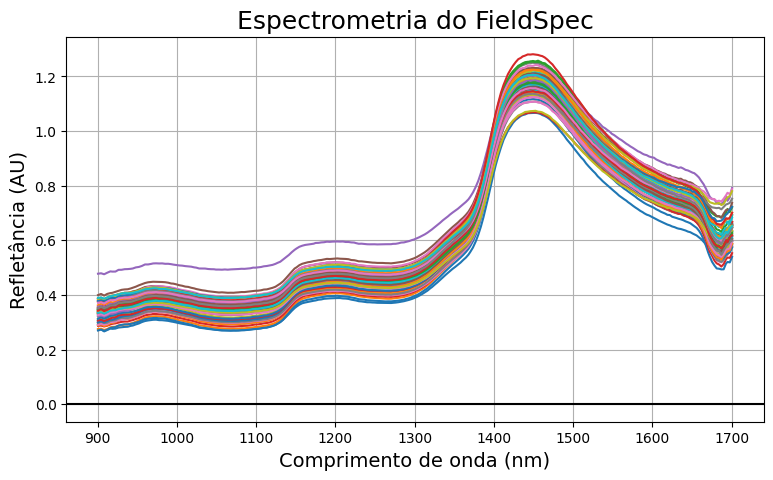

In [5]:
plt.figure(figsize=(9,5))
plt.plot(wl, dados_wl.T)
plt.xlabel("Comprimento de onda (nm)", size=14)
plt.ylabel("Refletância (AU)", size=14)
plt.title("Espectrometria do FieldSpec", size=18)
plt.axhline(y=0, color='k', linewidth=1.5)
plt.grid("on")
plt.show()


# Pré-processamentos

### Savitzky-Golay

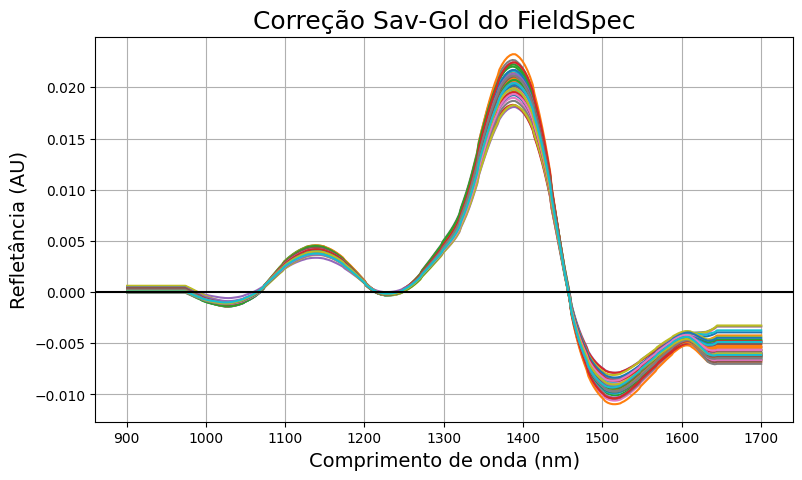

Dataset exported successfully to Excel.


In [20]:
sav_gol = savgol_filter(dados_wl, 41, polyorder=1, deriv=1) 
plt.figure(figsize=(9,5))
plt.plot(wl, sav_gol.T)
plt.xlabel("Comprimento de onda (nm)", size=14)
plt.ylabel("Refletância (AU)", size=14)
plt.title("Correção Sav-Gol do FieldSpec", size=18)
plt.axhline(y=0, color='k', linewidth=1.5)
plt.grid("on")
plt.show()

df_savgol = pd.DataFrame(sav_gol)
filename = 'data_savgol_ordem_1.xlsx'
df_savgol.to_excel(filename, index=False)
print("Dataset exported successfully to Excel.")

### MSC

In [7]:
def apply_msc(df):
    mean_spectrum = df.mean(axis=0)
    corrected_spectra = []
    
    for i in range(df.shape[0]):
        spectrum = df.iloc[i, :]
        slope, intercept = np.polyfit(mean_spectrum, spectrum, 1)
        corrected_spectrum = (spectrum - intercept) / slope
        corrected_spectra.append(corrected_spectrum)
    
    corrected_df = pd.DataFrame(corrected_spectra, columns=df.columns)
    
    return corrected_df

df_msc = apply_msc(dados_wl)

df = pd.DataFrame(df_msc)
filename = 'data_msc.xlsx'
df.to_excel(filename, index=False)
print("Dataset exported successfully to Excel.")

Dataset exported successfully to Excel.


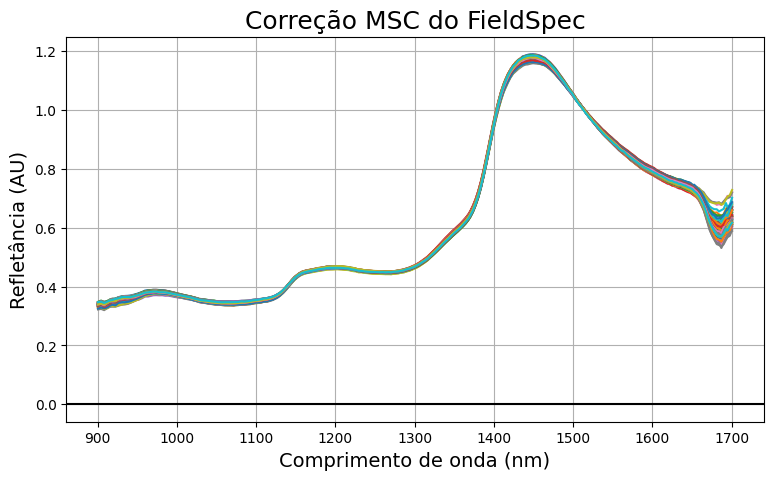

In [8]:
plt.figure(figsize=(9, 5))
plt.plot(wl, df_msc.T)
plt.xlabel("Comprimento de onda (nm)", size=14)
plt.ylabel("Refletância (AU)", size=14)
plt.title("Correção MSC do FieldSpec", size=18)
plt.axhline(y=0, color='k', linewidth=1.5)
plt.grid("on")
plt.show()

### SNV

In [9]:
def snv(input_data):
    mean = np.mean(input_data, axis=1, keepdims=True)
    std_dev = np.std(input_data, axis=1, keepdims=True)
    snv_data = (input_data - mean) / std_dev
    return snv_data

df_snv = snv(dados_wl.values)
df_snv = pd.DataFrame(df_snv, columns=wl)

filename = "data_snv.xlsx"
df_snv.to_excel(filename, index=False)
print("Dataset exported successfully to Excel.")

Dataset exported successfully to Excel.


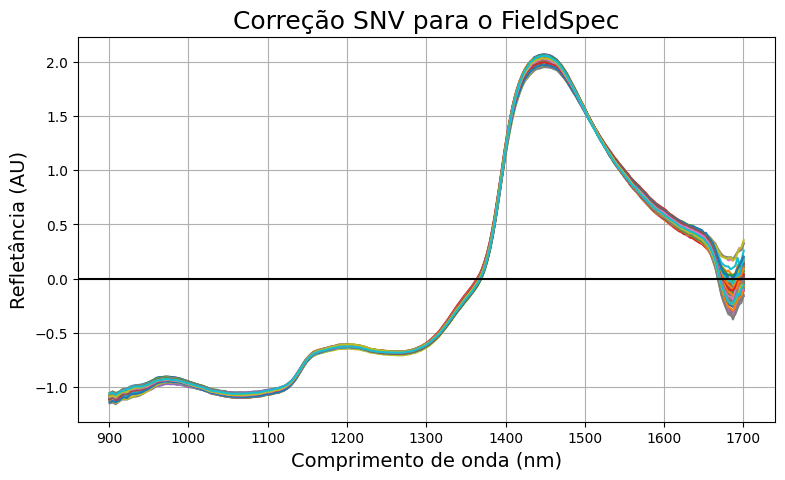

In [10]:
plt.figure(figsize=(9, 5))
plt.plot(wl, df_snv.T)
plt.xlabel("Comprimento de onda (nm)", size=14)
plt.ylabel("Refletância (AU)", size=14)
plt.title("Correção SNV para o FieldSpec", size=18)
plt.axhline(y=0, color='k', linewidth=1.5)
plt.grid("on")
plt.show()

In [11]:
import numpy as np
from sklearn.decomposition import PCA

def osc(X, y, n_components=250):
    """
    Aplica o OSC para remover variações ortogonais aos dados espectrais X
    considerando a variável de resposta y.

    X: Matriz de dados espectrais (amostras x variáveis)
    y: Variável de resposta (amostras)
    n_components: Número de componentes ortogonais a serem removidos
    """
    X_centered = X - X.mean(axis=0)
    y_centered = y - y.mean(axis=0)
    
    # Calcular a projeção da variável de resposta
    pca_y = PCA(n_components=n_components)
    T = pca_y.fit_transform(y_centered.reshape(-1, 1))
    
    # Calcular os loadings dos componentes ortogonais
    P = np.dot(np.dot(X_centered.T, T), np.linalg.inv(np.dot(T.T, T)))
    
    # Remover variação ortogonal
    X_osc = X_centered - np.dot(T, P.T)
    
    return X_osc

# Exemplo de uso
X = dados_wl.values
y = fs_df['SST (°brix)'].values  # Variável de resposta simulada


X_osc = osc(X, y, n_components=1)
X_osc


array([[-0.05443219, -0.05668862, -0.05968668, ..., -0.04684388,
        -0.04727809, -0.05161075],
       [-0.0454384 , -0.04724269, -0.04708744, ...,  0.01569534,
         0.00836808,  0.0071026 ],
       [-0.01148426, -0.01029773, -0.01287757, ...,  0.02880246,
         0.03120891,  0.02191027],
       ...,
       [ 0.01159834,  0.01396314,  0.0134075 , ..., -0.00192825,
         0.00215931,  0.00036457],
       [ 0.03511841,  0.03420225,  0.03605739, ...,  0.00706641,
         0.01376081, -0.00052095],
       [ 0.03993121,  0.0381263 ,  0.03871272, ..., -0.0030613 ,
         0.00552818, -0.00056869]])

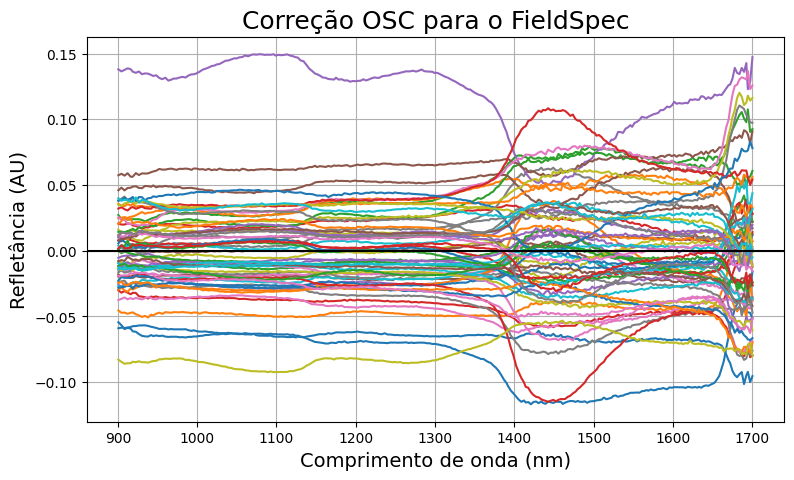

In [12]:
plt.figure(figsize=(9, 5))
plt.plot(wl, X_osc.T)
plt.xlabel("Comprimento de onda (nm)", size=14)
plt.ylabel("Refletância (AU)", size=14)
plt.title("Correção OSC para o FieldSpec", size=18)
plt.axhline(y=0, color='k', linewidth=1.5)
plt.grid("on")
plt.show()

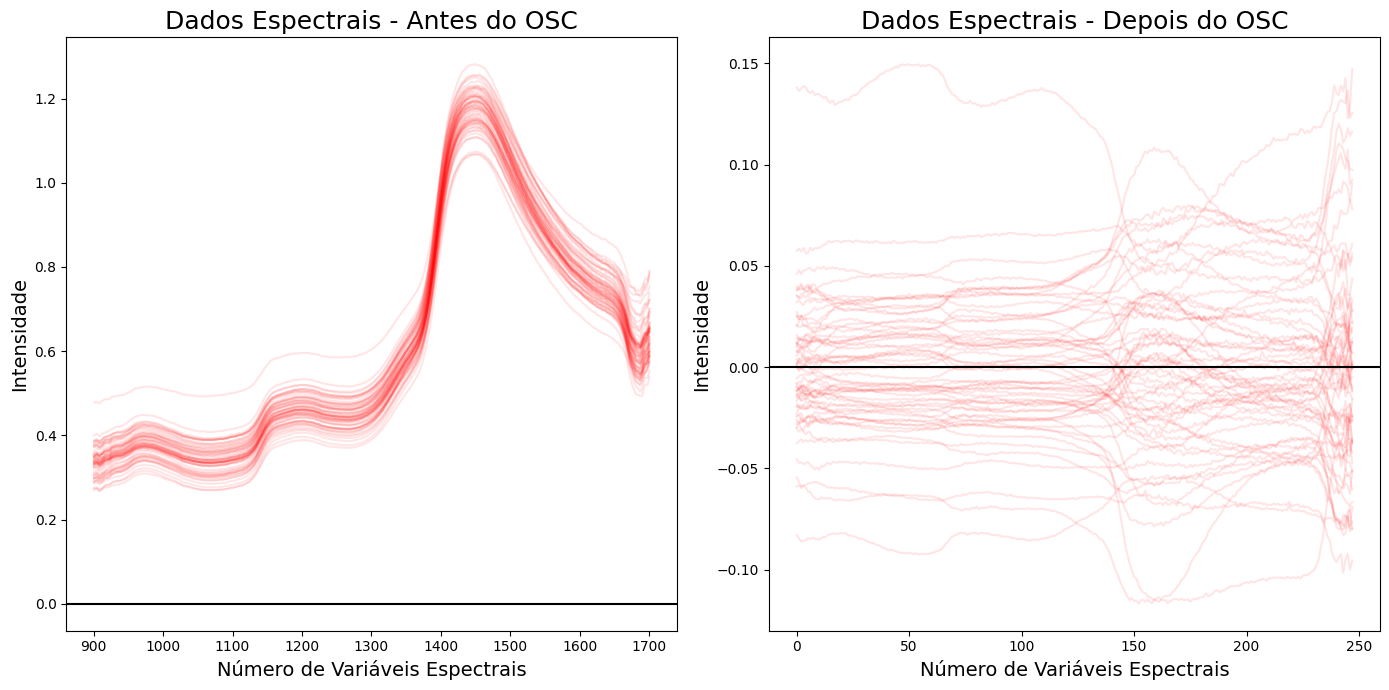

In [13]:
# Plotando os dados
plt.figure(figsize=(14, 7))

# Antes do OSC
plt.subplot(1, 2, 1)
plt.plot(dados_wl.T, color='red', alpha=0.1)
plt.xlabel("Número de Variáveis Espectrais", size=14)
plt.ylabel("Intensidade", size=14)
plt.title("Dados Espectrais - Antes do OSC", size=18)
plt.axhline(y=0, color='k', linewidth=1.5)

# Depois do OSC
plt.subplot(1, 2, 2)
plt.plot(X_osc.T, color='red', alpha=0.1)
plt.xlabel("Número de Variáveis Espectrais", size=14)
plt.ylabel("Intensidade", size=14)
plt.title("Dados Espectrais - Depois do OSC", size=18)
plt.axhline(y=0, color='k', linewidth=1.5)

plt.tight_layout()
plt.show()